## Assignment 10
### ACD MDS Mar 2018 batch - Student: K. Anandaranga

In [228]:
# Read the dataset from the below link
# https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

#1. Delete unnamed columns
#2. Show the distribution of male and female
#3. Show the top 5 most preferred names
#4. What is the median name occurrence in the dataset
#5. Distribution of male and female born count by states

In [229]:
# Reading the data
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")


In [230]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [231]:
df.shape

(1016395, 7)

In [232]:
#1 - Delete unnamed columns
df.drop (["Unnamed: 0"], axis = 1, inplace = True)

In [233]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [234]:
df.info() # shows that there are no null values to worry about

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 6 columns):
Id        1016395 non-null int64
Name      1016395 non-null object
Year      1016395 non-null int64
Gender    1016395 non-null object
State     1016395 non-null object
Count     1016395 non-null int64
dtypes: int64(3), object(3)
memory usage: 46.5+ MB


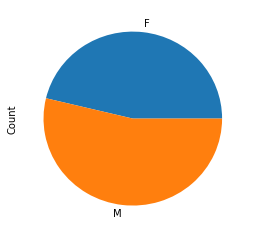

In [236]:
#2 - Distribution of Male and Female
import matplotlib.pyplot as plt
%matplotlib inline

gender_dist = df.groupby(['Gender']).Count.sum()
gender_dist.plot.pie(figsize=(4, 4))

In [247]:
#3 Top 5 most preferred names

grp_name = df.groupby (["Name"])["Count"].sum().sort_values (ascending = False).reset_index()
grp_name.head()

,Name,Count
0,Jacob,242874
1,Emma,214852
2,Michael,214405
3,Ethan,209277
4,Isabella,204798


In [257]:
#4 What is the median name occurence in the dataset

m = grp_name.agg([np.median])  # find the 'count' that is the median value... which is 49
val = m.iloc[0,0]
val

49.0

In [258]:
# There are 66 instances that occur 49 times each
grp_name.loc[grp_name['Count'] == val]

,Name,Count
8752,Leylanie,49
8753,Jaice,49
8754,Deante,49
8755,Jeovany,49
8756,Sanjuanita,49
8757,Riot,49
8758,Nazier,49
8759,Darvin,49
8760,Nabeel,49
8761,Nishant,49


Gender        F        M
State                   
AK        26250    37399
AL       215308   260114
AR       129712   162947
AZ       368567   439691
CA      2414063  2670584
CO       260805   313425
CT       141350   171397
DC        35276    47228
DE        31312    41748
FL       915422  1060957
GA       549637   635531
HI        37279    53127
IA       144764   174009
ID        72808    94320
IL       695312   791679
IN       344962   408525
KS       147216   179824
KY       210201   250589
LA       221859   271646
MA       294236   343996
MD       269915   315331
ME        43718    55650
MI       480990   557090
MN       276884   318917
MO       307848   364924
MS       127343   160800
MT        31622    44143
NC       501151   577529
ND        30054    39507
NE        88998   112369
NH        45065    56482
NJ       425430   487900
NM        85115   113542
NV       123730   156037
NY      1036009  1172145
OH       598027   688343
OK       184967   228613
OR       172111   209445


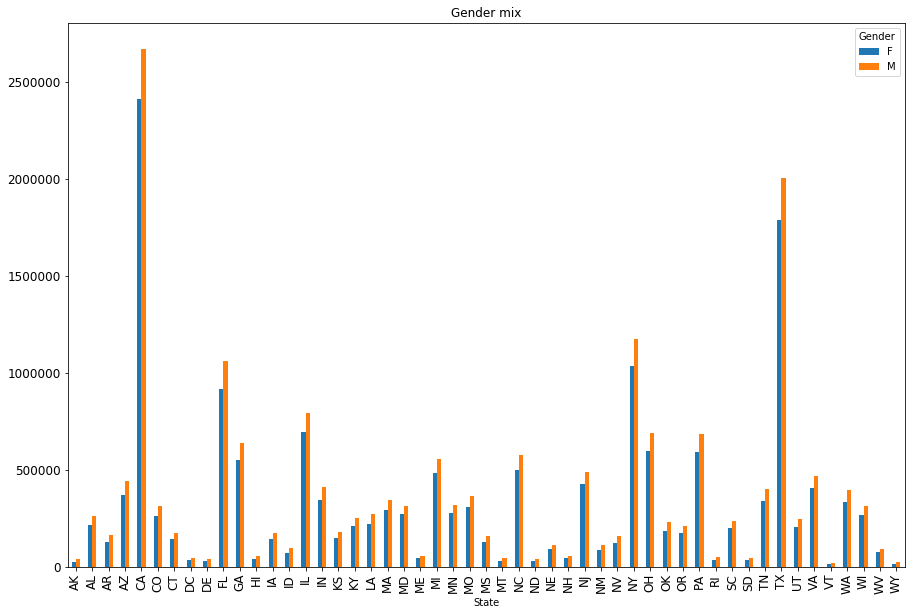

In [259]:
#5 Distribution of male and female born count by states

grp_state_gender = df.groupby(["State","Gender"])

# Unstack the group by DataFrame to get it ready for plotting
df2 = grp_state_gender['Count'].aggregate(np.sum).unstack(level=1)
print (df2)
df2.plot(kind = 'bar', title ="Gender mix",figsize=(15,10),legend=True, fontsize=12)